# Arquitectura de Una Red Neuronal

En resumen, la arquitectura de una ANN está definida por el número y la forma de sus capas. En el estado del arte de estas ANN esas arquitecturas suelen ser un poco complejas, con algunas capas saltando sobre otras capas o capas que retornan información de regreso a capas anteriores.

En este notebook veremos un ejemplo sencillo de una ANN y cual es la función de cada una de las capas que la componen. Para diseñar esta ANN usaremos el framework [PyTorch](https://pytorch.org/) y el dataset estándar para la clasificación de tres especies de flores [IRIS](https://archive.ics.uci.edu/ml/datasets/Iris).

# Ejercicio

En este notebook construiremos una ANN sencilla para hacer un ejercicio de clasificación usando el dataset [IRIS](https://archive.ics.uci.edu/ml/datasets/Iris).

In [1]:
#--- Importamos paquetes escenciales
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#-- Extraemos la infromación más importante
X = iris['data']
Y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

#-- Normalizamos los datos para que tengan media 0 y desviación 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#-- Dividimos los datos entre un conjunto de entrenamiento y testeo
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

#-- Visualizamos el tamaño de los datos de entrenamiento
np.shape(X_train)

(120, 4)

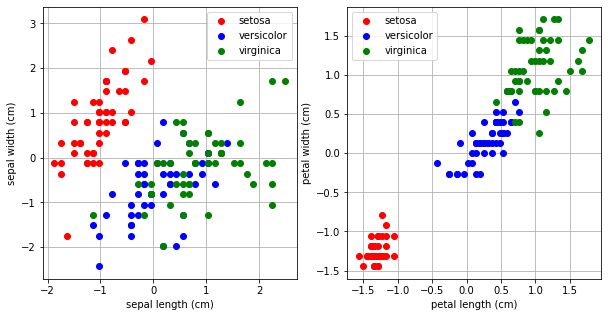

In [4]:
#--Visualizamos los datos
class0 = Y == 0
class1 = Y == 1
class2 = Y == 2


fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(X_scaled[:,0][class0],X_scaled[:,1][class0],'o',c='red', label=names[0])
plt.plot(X_scaled[:,0][class1],X_scaled[:,1][class1],'o',c='blue', label=names[1])
plt.plot(X_scaled[:,0][class2],X_scaled[:,1][class2],'o',c='green', label=names[2])
plt.grid()
plt.legend()
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.subplot(1,2,2)
plt.plot(X_scaled[:,2][class0],X_scaled[:,3][class0],'o',c='red', label=names[0])
plt.plot(X_scaled[:,2][class1],X_scaled[:,3][class1],'o',c='blue', label=names[1])
plt.plot(X_scaled[:,2][class2],X_scaled[:,3][class2],'o',c='green', label=names[2])
plt.grid()
plt.legend()
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.show()

# Artificial Neural Network con Pytorch

Vamos a crear una ANN de 3 capas lineales, las dos primeras tendrán funciones de activación tipo ReLU y la última una función de activación tipo Softmax.

In [5]:
#--- Importamos el paquete torch
import torch
from torch.autograd import Variable # Para convertir los datos a tensores

#--- Definimos la secuencia de capas de la ANN
input_dim = X_train.shape[1]
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 50),
                torch.nn.ReLU(),
                torch.nn.Linear(50, 50),
                torch.nn.ReLU(),
                torch.nn.Linear(50, input_dim),
                torch.nn.Softmax(dim=1)
                )
model

Sequential(
  (0): Linear(in_features=4, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=4, bias=True)
  (5): Softmax(dim=1)
)

In [6]:
#-- Definimos el optimizador y el criterio de evaluación

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [7]:
#--- Definimos el número de épocas

n_epoch  = 100

#-- Convertimos los datos a tensores
X_train_tensor = Variable(torch.from_numpy(X_train)).float()
Y_train_tensor = Variable(torch.from_numpy(Y_train)).long()
X_test_tensor  = Variable(torch.from_numpy(X_test)).float()
Y_test_tensor  = Variable(torch.from_numpy(Y_test)).long()

#-- Definimos párametros para almacenar la evalaución el entrenamiento de la red en función del número de épocas
loss_list     = np.zeros(n_epoch)
accuracy_list = np.zeros(n_epoch)

#-- Iniciamos el entrenamiento
for epoch in range(n_epoch):
    Y_pred = model(X_train_tensor)
    loss = criterion(Y_pred, Y_train_tensor)
    loss_list[epoch] = loss.item()
    
    # Gradiente Cero
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Nuevo paso
    optimizer.step()
    
    correct = (torch.argmax(Y_pred, dim=1) == Y_train_tensor).type(torch.FloatTensor)
    accuracy_list[epoch] = correct.mean()

    print('Epoch [{}/{}], loss: {}, acc: {}'.format(epoch+1,n_epoch,loss_list[epoch],accuracy_list[epoch]))

Epoch [1/100], loss: 1.3819819688796997, acc: 0.18333333730697632
Epoch [2/100], loss: 1.3766793012619019, acc: 0.2750000059604645
Epoch [3/100], loss: 1.3713324069976807, acc: 0.3499999940395355
Epoch [4/100], loss: 1.3659329414367676, acc: 0.5083333253860474
Epoch [5/100], loss: 1.3604167699813843, acc: 0.6166666746139526
Epoch [6/100], loss: 1.354759931564331, acc: 0.7666666507720947
Epoch [7/100], loss: 1.3489842414855957, acc: 0.7833333611488342
Epoch [8/100], loss: 1.3430917263031006, acc: 0.8166666626930237
Epoch [9/100], loss: 1.3370667695999146, acc: 0.8166666626930237
Epoch [10/100], loss: 1.3308932781219482, acc: 0.8166666626930237
Epoch [11/100], loss: 1.3245761394500732, acc: 0.824999988079071
Epoch [12/100], loss: 1.3180879354476929, acc: 0.8166666626930237
Epoch [13/100], loss: 1.311427354812622, acc: 0.8333333134651184
Epoch [14/100], loss: 1.3045858144760132, acc: 0.824999988079071
Epoch [15/100], loss: 1.297529935836792, acc: 0.824999988079071
Epoch [16/100], loss: 1.

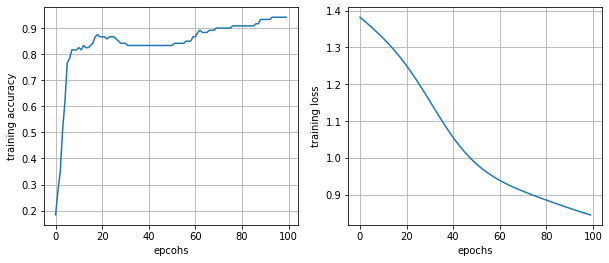

In [8]:
#-- Graficamos la precisión y la perdida para el set de entrenamiento
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(accuracy_list)
plt.ylabel("training accuracy")
plt.xlabel("epcohs")
plt.grid()

plt.subplot(1,2,2)
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

In [9]:
#-- Evaluamos con el set de testeo

Y_pred = model(X_test_tensor)
loss = criterion(Y_pred, Y_test_tensor)
correct = (torch.argmax(Y_pred, dim=1) == Y_test_tensor).type(torch.FloatTensor)

print('Loss: {}, Acc:{}'.format(loss, correct.mean()))

Loss: 0.8162540793418884, Acc:0.9666666388511658
